In [97]:
%matplotlib inline
from IPython.display import display

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from scipy import stats
import sys
import math

## Find and parse real and baseline layout files
Files are not neatly organized 

In [98]:
dataset_id = "calcuta" # Program argument

In [99]:
rectangles_dirs = [d[0] for d in os.walk("../rectangles/")]
rectangles_dirs.sort()
baseline_dirs = [d for d in rectangles_dirs if dataset_id in d and "baseLine" in d]
real_dirs = [d for d in rectangles_dirs if dataset_id in d and "baseLine" not in d]

In [100]:
def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [101]:
technique_ids = []
rectangles = {}
for i in range(len(real_dirs)):
    # Match technique name from path
    match = re.match("../rectangles/(\w+)", real_dirs[i])
    technique_id = ''
    if match:
        technique_id = match.group(1)
        technique_ids.append(technique_id)
    else:
        print("Invalid path: ", real_dirs[i])
    
    real_rectangles_paths = [os.path.join(real_dirs[i], f) for f in os.listdir(real_dirs[i]) if os.path.isfile(os.path.join(real_dirs[i], f))]
    real_rectangles_paths = natural_sort(real_rectangles_paths)
    baseline_rectangles_paths = [os.path.join(baseline_dirs[i], f) for f in os.listdir(baseline_dirs[i]) if os.path.isfile(os.path.join(baseline_dirs[i], f))]
    baseline_rectangles_paths = natural_sort(baseline_rectangles_paths)
    
    dataframes = []
    # Real i matches with Baseline i-1 
    # Revision 0 doesn't have a Baseline, but we'll need the Real layout for Aspect Ratio statistics 
    
    real_df = pd.read_csv(real_rectangles_paths[0], header=None)
    column_names = ['id', 'rx', 'ry', 'rw', 'rh']
    real_df.columns = column_names
    real_df.set_index('id', inplace=True)
    dataframes.append(real_df)
    
    # Read remaining revisions
    for j in range(len(real_rectangles_paths) - 1):
        # print(real_rectangles_paths[j+1], baseline_rectangles_paths[j])
        # Read Real
        column_names = ['id', 'rx', 'ry', 'rw', 'rh']
        real_df = pd.read_csv(real_rectangles_paths[j+1], header=None)
        real_df.columns = column_names
        real_df.set_index('id', inplace=True)
        # Read Baseline
        column_names = ['id', 'bx', 'by', 'bw', 'bh']
        baseline_df = pd.read_csv(baseline_rectangles_paths[j], header=None)
        baseline_df.columns = column_names
        baseline_df.set_index('id', inplace=True)
        
        df = pd.concat([real_df, baseline_df], axis=1, join='inner')
        dataframes.append(df)
        
    rectangles[technique_id] = dataframes
    

In [102]:
print(technique_ids)
print('Head of revision 0')
display(rectangles["ApproximationTreeMap"][0].head())
print('Head of revision 1')
display(rectangles["ApproximationTreeMap"][1].head())
n_revisions = len(rectangles["ApproximationTreeMap"])

['ApproximationTreeMap', 'HilbertTreeMap', 'IncrementalLayout', 'MooreTreeMap', 'PivotByMiddle', 'PivotBySize', 'PivotBySplit', 'SliceAndDice', 'SpiralTreeMap', 'SquarifiedTreeMap', 'StripTreeMap']
Head of revision 0


,rx,ry,rw,rh
id,,,,
root/p/src/main/java/com/iwsbrazil/calcuta/MainActivity.java,597.560976,397.575758,402.439024,258.424242
root/p/src/main/res/layout/activity_main.xml,0.000000,481.959184,321.763602,174.040816
root/p/src/main/res/values/strings.xml,473.069106,289.175510,124.491870,192.783673
root/p/src/main/res/values/colors.xml,265.582656,0.000000,331.978320,289.175510
root/p/src/main/res/values/dimens.xml,265.582656,289.175510,207.486450,192.783673


Head of revision 1


,rx,ry,rw,rh,bx,by,bw,bh
id,,,,,,,,
root/p/src/androidTest/java/com/iwsbrazil/calcuta/ExampleInstrumentedTest.java,0.000000,713.333333,604.651163,286.666667,20.534387,671.410204,566.522764,308.013474
root/p/src/test/java/com/iwsbrazil/calcuta/ExampleUnitTest.java,604.651163,713.333333,395.348837,286.666667,609.046883,671.410204,370.418730,308.013474
root/p/src/main/res/layout/activity_main.xml,0.000000,524.081633,246.585191,189.251701,20.534387,493.921161,298.536712,157.367131
root/p/src/main/res/values/strings.xml,274.766355,414.897959,183.177570,109.183673,485.263876,293.071011,111.471342,180.622462
root/p/src/main/res/values/colors.xml,0.000000,232.925170,274.766355,291.156463,278.463291,20.576322,318.271927,253.044350


# Compute Aspect Ratios

In [103]:
def styleBoxplot(bp, ax, n_revisions):
    
    def get_ax_size(ax):
        bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        width, height = bbox.width, bbox.height
        width *= fig.dpi
        height *= fig.dpi
        return width, height
    
    for box in bp['boxes']:
        # change outline color
        box.set(color='#1b9e77',
                linewidth=0,
                path_effects=[pe.Stroke(linewidth=0.1, foreground='#1b9e77'), pe.Normal()],
                facecolor='#1b9e77')
        box.set_zorder(10)
    for i, median in enumerate(bp['medians']):
        median.set(color='#1445FF', 
                   linewidth=2, 
                   solid_capstyle="butt", 
                   ms=(get_ax_size(ax)[0])/(n_revisions))
        median.set_zorder(11)
        #median.set_xdata([i + 1 - 0.3, i + 1 + 0.3])
    for whisker in bp['whiskers']:
        whisker.set(color='#CCCCCC',
                    linestyle='-', 
                    solid_capstyle="butt", 
                    path_effects=[pe.Stroke(linewidth=2, foreground='#1b9e77'), pe.Normal()],
                    linewidth=(get_ax_size(ax)[0])/(n_revisions))
    for cap in bp['caps']:
        cap.set(color='#FFFFFF', linewidth=0)
        
    # Set only 3 ticks on x
    ax.set_xticks([1, n_revisions / 2, n_revisions], minor=False)
    ax.set_xticklabels([1, int(n_revisions / 2), n_revisions], fontdict=None, minor=False)
    
    # Remove extra spines and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off', left='off')

In [104]:
technique_ids

['ApproximationTreeMap',
 'HilbertTreeMap',
 'IncrementalLayout',
 'MooreTreeMap',
 'PivotByMiddle',
 'PivotBySize',
 'PivotBySplit',
 'SliceAndDice',
 'SpiralTreeMap',
 'SquarifiedTreeMap',
 'StripTreeMap']

50
50
50
50
50
50
50
50
50
50
50


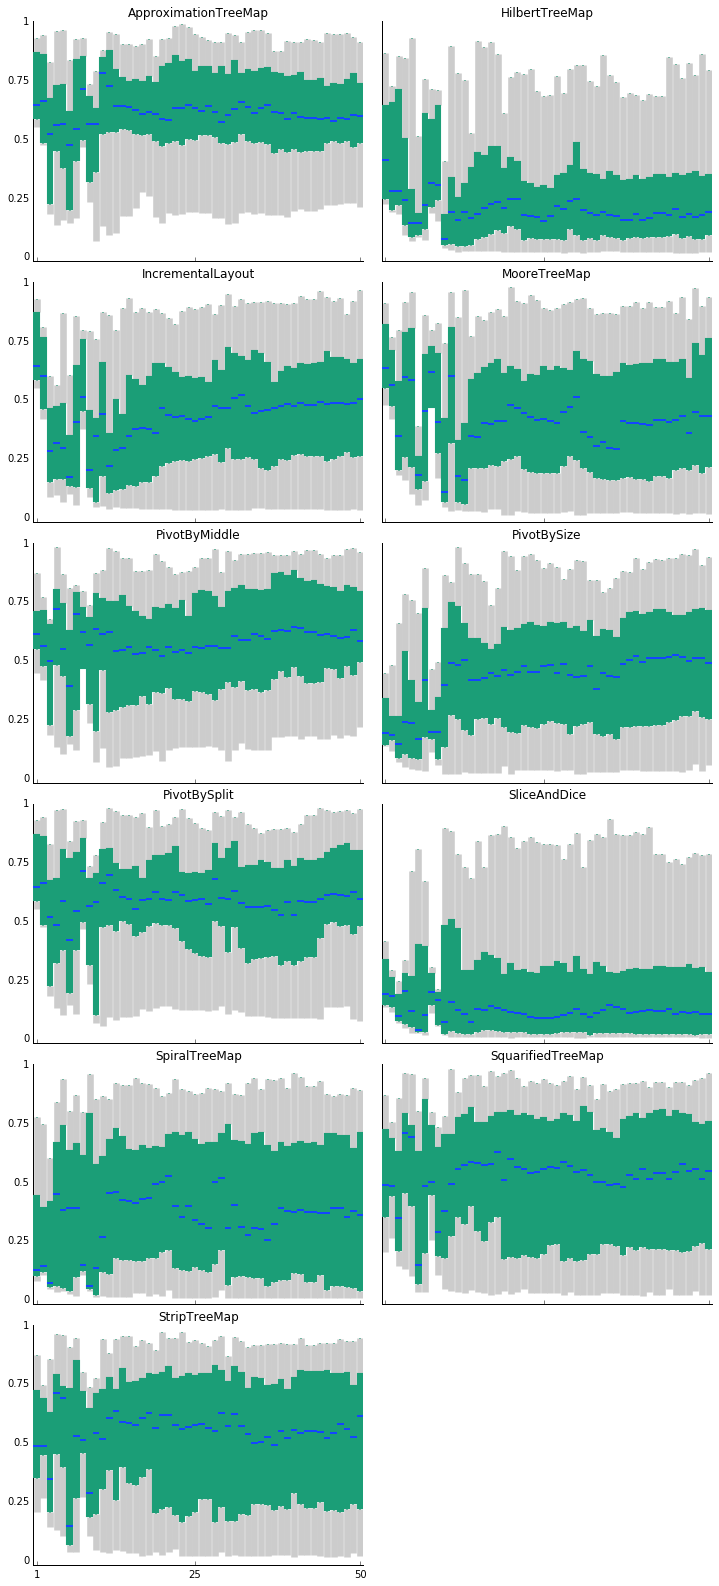

In [105]:
nrow = 6
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(10, 22))
fig.delaxes(axs[5, 1])
fig.tight_layout()

for i, ax in enumerate(fig.axes):
    technique = technique_ids[i]
    ax.set_title(technique)
    print(technique)
    
    data = []
    for revision in range(n_revisions):
        df = rectangles[technique][revision]
        ars = df[['rw', 'rh']].min(axis=1) / df[['rw', 'rh']].max(axis=1)
        data.append(ars)
    bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    
    ax.set_ylim(ymin=-0.02, ymax=1)
    ax.set_yticks([0, .25, .5, .75, 1], minor=False)
    ax.set_yticklabels([0, .25, .5, .75, 1], fontdict=None, minor=False)
    styleBoxplot(bp, ax, len(data))
    fig.savefig(dataset_id + "_ar" + '.svg')